# Preparing my Dataframe

In [42]:
# Importing necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [43]:
from spotipy.oauth2 import SpotifyOAuth

scope = 'user-top-read'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id='8dc487ca6f0649c2a0ead352d10c78e8', 
client_secret='241cb7adf982411ea91c8eb7f9c5ab56', redirect_uri='http://localhost/'))
username = sp.me()['id']

## Extracting Top 50 Tracks

In [44]:
def get_user_top_50_tracks(sp, time_range, limit=50):
    top_tracks_data = sp.current_user_top_tracks(limit=limit, time_range=time_range)
    tracks = []

    for track in top_tracks_data['items']:
        track_details = {
            'id': track['id'],
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'release_date': track['album']['release_date'],
            'popularity': track['popularity']
        }
        tracks.append(track_details)

    return tracks

In [45]:

track_list = get_user_top_50_tracks(sp, 'medium_term')

In [46]:
df_tracks = pd.DataFrame(track_list)

# Drop duplicates if any (as the same track might appear in different time ranges)
df_tracks = df_tracks.drop_duplicates(subset='id')

df_tracks.head()

,id,name,artist,album,release_date,popularity
0,6Abj5zPCnEtagVnBUeEFzo,Ay Dilbere,Diyar23,Ay Dilbere,2023-07-06,50
1,5yNz1lsiB9Rpz2TUWw2XZX,"Love, Gun",Heijan,Hermano,2023-04-28,69
2,4b3nrmlLfQloDmY3fGq35S,Heaven Interlude,SUMMER ALONE,"Sleep Longer, You'll Be Ok",2020-10-31,19
3,6Bo5gvXBVC7H3aud52i9ZX,Haydi Söyle,İbrahim Tatlıses,Haydi Söyle,1994-08-05,56
4,3cCMf3jKKvQ6G8fqsg6YJ1,Tek Başınalığın Yolcusu,Sagopa Kajmer,Kötü İnsanları Tanıma Senesi,2008-03-14,50


In [47]:
df_tracks.shape

(50, 6)

In [48]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50 non-null     object
 1   name          50 non-null     object
 2   artist        50 non-null     object
 3   album         50 non-null     object
 4   release_date  50 non-null     object
 5   popularity    50 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.7+ KB


In [49]:
df_tracks.describe()

,popularity
count,50.000000
mean,58.460000
std,17.004453
min,19.000000
25%,49.000000
50%,56.500000
75%,70.750000
max,90.000000


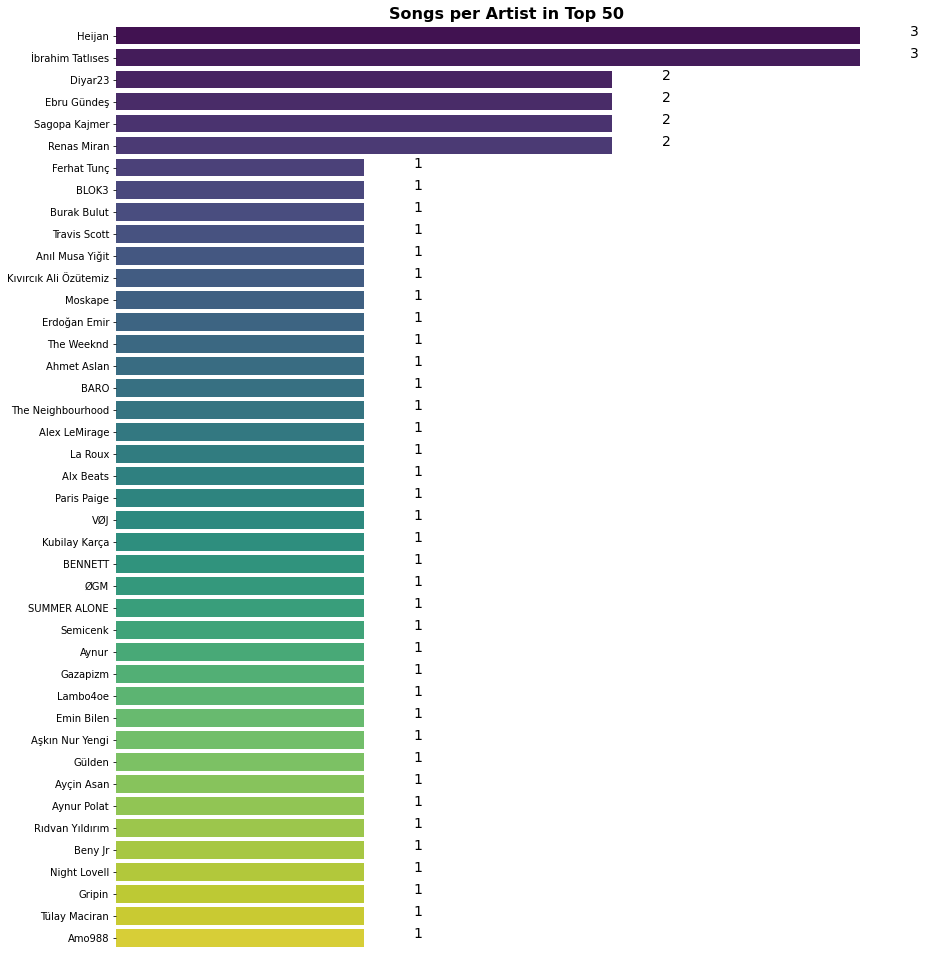

In [50]:
# Count the occurrences of each artist and sort in descending order
artist_counts = df_tracks['artist'].value_counts()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Artist': artist_counts.index, 'Songs': artist_counts.values})

# Set the figure size
plt.figure(figsize=(14, 17))

# Create the bar plot
barplot = sns.barplot(x='Songs', y='Artist', data=plot_data, palette='viridis')

# Customize the appearance
sns.despine(left=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Songs per Artist in Top 50', fontsize=16, fontweight='heavy')
plt.xticks([])
plt.box(False)

# Add text labels
for index, value in enumerate(plot_data['Songs']):
    plt.text(value + 0.2, index, str(value), color='black', fontweight='light', fontsize=14)

# Show the plot
plt.show()


## Extracting the playlists

In [51]:
# Fetch the user's playlists
client_credentials_manager = SpotifyClientCredentials(client_id='3857aeeddd514e6280b8eb7c995f3dff', client_secret='edcf596554814a7a9367d0529faf5346') 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists(username)
for playlist in playlists['items']:
    print('Name: {}, Playlist ID: {}, No Tracks: {}'.
          format(playlist['name'], playlist['id'], playlist['tracks']['total']))

Name: Galatasaray Marşları, Playlist ID: 3QMlaUPnX8M9mOnelCav7K, No Tracks: 130
Name: Passat CD, Playlist ID: 5tTxrAAF3gQKG5cSAGiOS2, No Tracks: 121
Name: ben de şey dedim "OLABİLİR", Playlist ID: 1iseb8IaYwBwGb7rYc71r2, No Tracks: 168
Name: After House, Playlist ID: 0FKXfSuJemWseuCqQqehkJ, No Tracks: 57
Name: knight of night, Playlist ID: 2G8eVKrfKb9LZtj5J58MR2, No Tracks: 85
Name: Duble, Playlist ID: 3Nd6WMQsuRVORgxCv065ij, No Tracks: 116
Name: Galericiler, Pırlantacılar..., Playlist ID: 6OJZ3Jgd4C3kIc0BfVgH3z, No Tracks: 116
Name: Chill House, Playlist ID: 6p1slgcDxG2lbkPF5Lyeez, No Tracks: 130
Name: Beverly Hills Radio, Playlist ID: 3igMb0LEOq6vlg30ujxTpF, No Tracks: 160
Name: De, Playlist ID: 4BL6jPycArO6Ul91PLyC4V, No Tracks: 34
Name: Rakıyı sek seni tek, Playlist ID: 3yt6YZOJfGIU7UYfIjgXO0, No Tracks: 178
Name: drivin' n vibin', Playlist ID: 1vUYB6nXfM5V8AID9ZIp41, No Tracks: 33
Name: techNO.1, Playlist ID: 5HweZSQ8KM8M2N8A06ev4r, No Tracks: 114
Name: Gölgesiz Hayaller, Playlist

In [52]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [53]:
fetch_playlists(sp,username)

,id,name,#tracks
0,3QMlaUPnX8M9mOnelCav7K,Galatasaray Marşları,130
1,5tTxrAAF3gQKG5cSAGiOS2,Passat CD,121
2,1iseb8IaYwBwGb7rYc71r2,"ben de şey dedim ""OLABİLİR""",168
3,0FKXfSuJemWseuCqQqehkJ,After House,57
4,2G8eVKrfKb9LZtj5J58MR2,knight of night,85
5,3Nd6WMQsuRVORgxCv065ij,Duble,116
6,6OJZ3Jgd4C3kIc0BfVgH3z,"Galericiler, Pırlantacılar...",116
7,6p1slgcDxG2lbkPF5Lyeez,Chill House,130
8,3igMb0LEOq6vlg30ujxTpF,Beverly Hills Radio,160
9,4BL6jPycArO6Ul91PLyC4V,De,34


## Extracting playlist tracks

In [54]:
import pandas as pd

def fetch_playlist_tracks(sp, username, playlist_id):
    """
    Returns a DataFrame with track IDs and names for the given playlist.
    """
    def get_tracks(sp, username, playlist_id, offset=0):
        """
        Helper function to fetch tracks with pagination.
        """
        while True:
            content = sp.user_playlist_tracks(username, playlist_id, limit=100, offset=offset)
            for item in content['items']:
                yield item['track']['id'], item['track']['name']
            
            if content['next'] is not None:
                offset += 100
            else:
                break

    # Use a generator to fetch and store track data
    track_data = list(get_tracks(sp, username, playlist_id))

    # Create and return the DataFrame
    df_playlists_tracks = pd.DataFrame(track_data, columns=["track_id", "track_name"])
    return df_playlists_tracks


In [59]:
p1 = fetch_playlist_tracks(sp,username,'1iseb8IaYwBwGb7rYc71r2')
p2 = fetch_playlist_tracks(sp,username,'1vUYB6nXfM5V8AID9ZIp41')
p3 = fetch_playlist_tracks(sp,username,'5HweZSQ8KM8M2N8A06ev4r')

In [60]:
all_tracks = pd.concat([p1,p2,p3])  

In [61]:
df_all_tracks = pd.DataFrame(all_tracks)

In [62]:
df_all_tracks

,track_id,track_name
0,7zSHJTT30oOsm2LrGlZte4,Sen Özgür Ol
1,4BYN1zTPCdANtnedM4bTCa,Yaz
2,6mcXPgXwsLHK6QITtee0BS,Vay Be - Mahmut Orhan Remix
3,3bvGaifvKsJZCOQ43wouro,Canımsın Sen - Volga Tamöz Remix
4,449yvBzJL6iR7LPUvLKfin,Yosun
...,...,...
109,1I0aQ7U6feL3NF1muq7u8z,Alive - Anyma Remix
110,5shIcQAo7zBQ8MwqAnWK9R,Close Your Eyes - Mixed
111,2Nq06gpBMrjYnBLpi0cNYy,Night After Night - CamelPhat Remix
112,31nfdEooLEq7dn3UMcIeB5,Vois sur ton chemin - Techno Mix


In [63]:
df_all_tracks.rename(columns={'track_id': 'id'}, inplace=True)


In [64]:
# Check the number of duplicates
num_duplicates = df_all_tracks.duplicated().sum()
print("Number of duplicates:", num_duplicates)

# Drop the duplicates
df_all_tracks = df_all_tracks.drop_duplicates()


Number of duplicates: 0


## Add audio features to tracks

In [65]:
def fetch_audio_features(sp, track_ids):
    features_list = []
    for i in range(0, len(track_ids), 50):  # Spotify's limit for audio_features is 50 IDs at a time
        batch = track_ids[i:i + 50]
        audio_features = sp.audio_features(batch)
        features_list.extend(audio_features)
    return features_list

# Fetch audio features for all unique tracks
unique_track_ids = df_all_tracks['id'].tolist()
audio_features = fetch_audio_features(sp, unique_track_ids)

# Create a DataFrame from audio features
df_features = pd.DataFrame(audio_features)

# Merge the features DataFrame with the tracks DataFrame
df_last = pd.merge(df_tracks, df_features, on='id', how='outer')



In [66]:
import pandas as pd

def fetch_audio_features(sp, track_ids):
    """
    Fetch audio features for given track IDs from Spotify in batches.

    Args:
    - sp: Spotify client instance
    - track_ids (list): List of Spotify track IDs

    Returns:
    - List of audio features for the tracks
    """
    features_list = []

    for i in range(0, len(track_ids), 50):
        batch = track_ids[i:i + 50]
        try:
            audio_features = sp.audio_features(batch)
            features_list.extend([feat for feat in audio_features if feat is not None])
        except Exception as e:
            print(f"Error fetching audio features for batch {i//50 + 1}: {e}")

    print(f"Fetched audio features for {len(features_list)} tracks.")
    return features_list

# Usage example
unique_track_ids = df_all_tracks['id'].tolist()
audio_features = fetch_audio_features(sp, unique_track_ids)
df_features = pd.DataFrame(audio_features)
df_last = pd.merge(df_tracks, df_features, on='id', how='right')  # 'left' to keep all tracks

# Check the resulting DataFrame
print(f"Original tracks DataFrame size: {df_tracks.shape[0]}")
print(f"Merged DataFrame size: {df_last.shape[0]}")


Fetched audio features for 315 tracks.
Original tracks DataFrame size: 50
Merged DataFrame size: 315


In [67]:
df_last.isnull().sum()

id                    0
name                305
artist              305
album               305
release_date        305
popularity          305
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
type                  0
uri                   0
track_href            0
analysis_url          0
duration_ms           0
time_signature        0
dtype: int64

In [68]:
import pandas as pd

def fetch_track_details(sp, track_ids):
    """
    Fetch track details (name and artist) for given track IDs from Spotify.

    Args:
    - sp: Spotify client instance
    - track_ids (list): List of Spotify track IDs

    Returns:
    - List of dictionaries with track details
    """
    track_details_list = []

    for track_id in track_ids:
        try:
            track = sp.track(track_id)
            track_name = track['name']
            artist_name = track['artists'][0]['name']  # assuming the first artist is the primary one
            track_popularity = track['popularity']  # Fetching popularity
            track_details_list.append({'id': track_id, 'name': track_name, 'artist': artist_name, 'popularity': track_popularity})
        except Exception as e:
            print(f"Error fetching details for track ID {track_id}: {e}")

    return track_details_list

# Fetch track details for all unique tracks
unique_track_ids = df_all_tracks['id'].tolist()
track_details = fetch_track_details(sp, unique_track_ids)

# Create a DataFrame from track details
df_track_details = pd.DataFrame(track_details)

# Merge the track details DataFrame with the audio features DataFrame
df_features = pd.DataFrame(audio_features)
df_last = pd.merge(df_track_details, df_features, on='id', how='left')

# Check the resulting DataFrame
print(f"Original tracks DataFrame size: {df_tracks.shape[0]}")
print(f"Merged DataFrame size: {df_last.shape[0]}")


Original tracks DataFrame size: 50
Merged DataFrame size: 315


In [69]:
df_last.isnull().sum() # Finally a final dataset with no null values, with audio features and track details

id                  0
name                0
artist              0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [70]:
df_last.head()

,id,name,artist,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,7zSHJTT30oOsm2LrGlZte4,Sen Özgür Ol,EDIS,19,0.576,0.667,10,-7.370,0,0.0701,...,0.000000,0.202,0.480,80.956,audio_features,spotify:track:7zSHJTT30oOsm2LrGlZte4,https://api.spotify.com/v1/tracks/7zSHJTT30oOs...,https://api.spotify.com/v1/audio-analysis/7zSH...,266229,4
1,4BYN1zTPCdANtnedM4bTCa,Yaz,Berkay,45,0.665,0.800,4,-5.450,0,0.0617,...,0.000002,0.342,0.395,97.030,audio_features,spotify:track:4BYN1zTPCdANtnedM4bTCa,https://api.spotify.com/v1/tracks/4BYN1zTPCdAN...,https://api.spotify.com/v1/audio-analysis/4BYN...,188364,4
2,6mcXPgXwsLHK6QITtee0BS,Vay Be - Mahmut Orhan Remix,Kenan Doğulu,40,0.533,0.857,9,-5.064,0,0.0673,...,0.015000,0.108,0.504,96.955,audio_features,spotify:track:6mcXPgXwsLHK6QITtee0BS,https://api.spotify.com/v1/tracks/6mcXPgXwsLHK...,https://api.spotify.com/v1/audio-analysis/6mcX...,267217,4
3,3bvGaifvKsJZCOQ43wouro,Canımsın Sen - Volga Tamöz Remix,Sezen Aksu,33,0.619,0.914,1,-6.162,0,0.0474,...,0.044200,0.296,0.577,128.028,audio_features,spotify:track:3bvGaifvKsJZCOQ43wouro,https://api.spotify.com/v1/tracks/3bvGaifvKsJZ...,https://api.spotify.com/v1/audio-analysis/3bvG...,337261,4
4,449yvBzJL6iR7LPUvLKfin,Yosun,Kenan Doğulu,56,0.497,0.633,3,-6.710,0,0.0809,...,0.000000,0.123,0.496,88.003,audio_features,spotify:track:449yvBzJL6iR7LPUvLKfin,https://api.spotify.com/v1/tracks/449yvBzJL6iR...,https://api.spotify.com/v1/audio-analysis/449y...,238245,4


In [71]:
df_last.shape

(315, 21)

In [72]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                315 non-null    object 
 1   name              315 non-null    object 
 2   artist            315 non-null    object 
 3   popularity        315 non-null    int64  
 4   danceability      315 non-null    float64
 5   energy            315 non-null    float64
 6   key               315 non-null    int64  
 7   loudness          315 non-null    float64
 8   mode              315 non-null    int64  
 9   speechiness       315 non-null    float64
 10  acousticness      315 non-null    float64
 11  instrumentalness  315 non-null    float64
 12  liveness          315 non-null    float64
 13  valence           315 non-null    float64
 14  tempo             315 non-null    float64
 15  type              315 non-null    object 
 16  uri               315 non-null    object 
 1

In [73]:
df_last.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,48.260317,0.650206,0.695476,5.669841,-7.629762,0.266667,0.078200,0.223008,0.191569,0.168413,0.431820,123.449067,258092.609524,3.952381
std,20.086014,0.144055,0.172448,3.279770,2.789873,0.442920,0.067931,0.250973,0.316616,0.123659,0.231887,23.989646,88883.515740,0.375549
min,0.000000,0.000000,0.040900,0.000000,-18.293000,0.000000,0.000000,0.000074,0.000000,0.027400,0.000000,0.000000,9400.000000,0.000000
25%,38.000000,0.566000,0.589000,3.000000,-9.296500,0.000000,0.039200,0.020100,0.000000,0.091400,0.270000,111.193000,200313.000000,4.000000
50%,52.000000,0.659000,0.712000,6.000000,-7.279000,0.000000,0.053000,0.112000,0.000119,0.117000,0.434000,123.876000,237122.000000,4.000000
75%,63.000000,0.757000,0.830500,8.000000,-5.728500,1.000000,0.083050,0.375000,0.312000,0.216500,0.594500,129.992000,283347.000000,4.000000
max,90.000000,0.985000,0.968000,11.000000,-2.200000,1.000000,0.402000,0.992000,0.948000,0.930000,0.960000,200.667000,562239.000000,5.000000


# EDA

In [74]:
df_last.head(3)

,id,name,artist,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,7zSHJTT30oOsm2LrGlZte4,Sen Özgür Ol,EDIS,19,0.576,0.667,10,-7.370,0,0.0701,...,0.000000,0.202,0.480,80.956,audio_features,spotify:track:7zSHJTT30oOsm2LrGlZte4,https://api.spotify.com/v1/tracks/7zSHJTT30oOs...,https://api.spotify.com/v1/audio-analysis/7zSH...,266229,4
1,4BYN1zTPCdANtnedM4bTCa,Yaz,Berkay,45,0.665,0.800,4,-5.450,0,0.0617,...,0.000002,0.342,0.395,97.030,audio_features,spotify:track:4BYN1zTPCdANtnedM4bTCa,https://api.spotify.com/v1/tracks/4BYN1zTPCdAN...,https://api.spotify.com/v1/audio-analysis/4BYN...,188364,4
2,6mcXPgXwsLHK6QITtee0BS,Vay Be - Mahmut Orhan Remix,Kenan Doğulu,40,0.533,0.857,9,-5.064,0,0.0673,...,0.015000,0.108,0.504,96.955,audio_features,spotify:track:6mcXPgXwsLHK6QITtee0BS,https://api.spotify.com/v1/tracks/6mcXPgXwsLHK...,https://api.spotify.com/v1/audio-analysis/6mcX...,267217,4


In [75]:
# Summary statistics for numerical features
df_last.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,48.260317,0.650206,0.695476,5.669841,-7.629762,0.266667,0.078200,0.223008,0.191569,0.168413,0.431820,123.449067,258092.609524,3.952381
std,20.086014,0.144055,0.172448,3.279770,2.789873,0.442920,0.067931,0.250973,0.316616,0.123659,0.231887,23.989646,88883.515740,0.375549
min,0.000000,0.000000,0.040900,0.000000,-18.293000,0.000000,0.000000,0.000074,0.000000,0.027400,0.000000,0.000000,9400.000000,0.000000
25%,38.000000,0.566000,0.589000,3.000000,-9.296500,0.000000,0.039200,0.020100,0.000000,0.091400,0.270000,111.193000,200313.000000,4.000000
50%,52.000000,0.659000,0.712000,6.000000,-7.279000,0.000000,0.053000,0.112000,0.000119,0.117000,0.434000,123.876000,237122.000000,4.000000
75%,63.000000,0.757000,0.830500,8.000000,-5.728500,1.000000,0.083050,0.375000,0.312000,0.216500,0.594500,129.992000,283347.000000,4.000000
max,90.000000,0.985000,0.968000,11.000000,-2.200000,1.000000,0.402000,0.992000,0.948000,0.930000,0.960000,200.667000,562239.000000,5.000000


In [76]:
# Frequency of artists
print(df_last['artist'].value_counts())


Şanışer           9
Sıla              7
KÖFN              6
Murat Dalkılıç    5
Buray             4
                 ..
Gökçe Kırgız      1
Harget Kart       1
Nükhet Duru       1
Linet             1
Naomi Sharon      1
Name: artist, Length: 224, dtype: int64


## Data Distribution

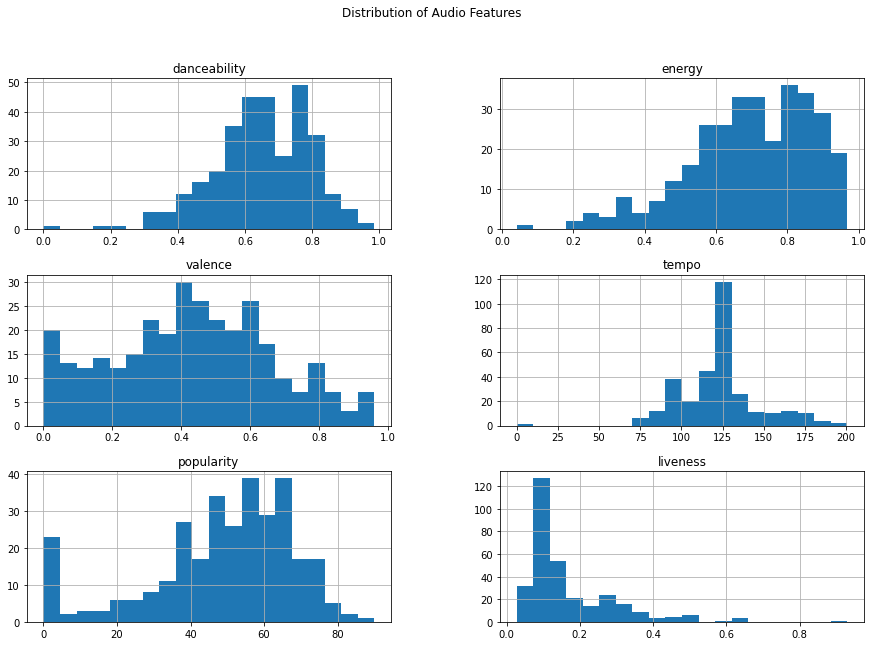

In [77]:
# Histograms for selected features
df_last[['danceability', 'energy', 'valence', 'tempo','popularity','liveness']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Audio Features')
plt.show()

## Relationship Between Features

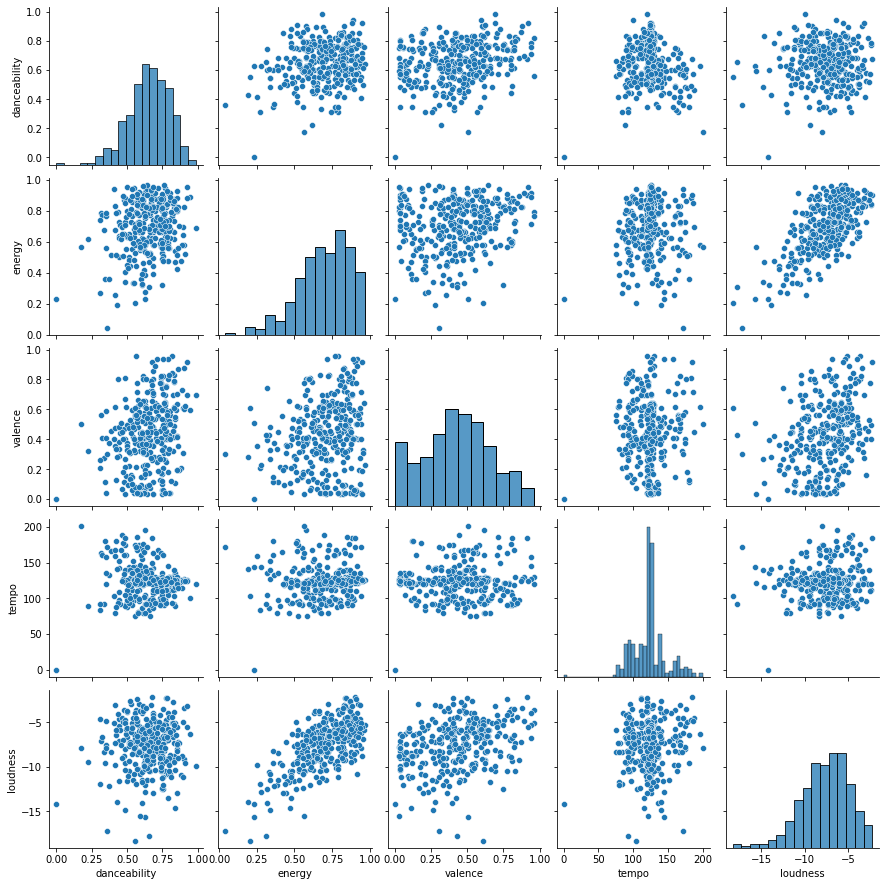

In [78]:
# Pair plot for a subset of features
sns.pairplot(df_last[['danceability', 'energy', 'valence', 'tempo','loudness']])
plt.show()



## Categorical Data Analysis

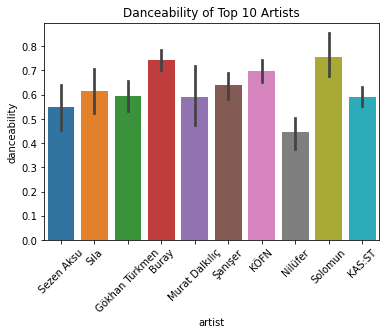

In [79]:
# Top artists' average danceability
top_artists = df_last['artist'].value_counts().index[:10]
sns.barplot(data=df_last[df_last['artist'].isin(top_artists)], x='artist', y='danceability')
plt.xticks(rotation=45)
plt.title('Danceability of Top 10 Artists')
plt.show()

## Correlation of the features

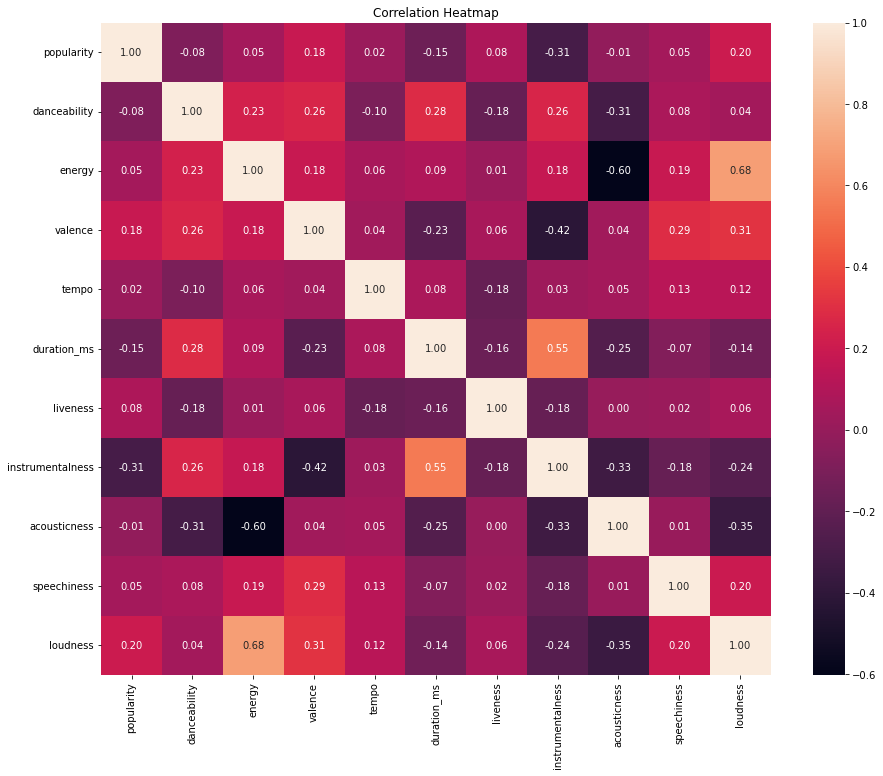

In [80]:
plt.figure(figsize=(15, 12))
plt.title('Correlation Heatmap')
sns.heatmap(df_last[['popularity', 'danceability', 'energy', 'valence', 'tempo', 'duration_ms','liveness','instrumentalness','acousticness','speechiness','loudness']].corr(), annot=True, fmt=".2f")
plt.show()

# Feature Engineering

In [81]:
# Lets add some features to the dataset for further use

df_last['duration_min'] = df_last['duration_ms'] / 60000


In [82]:
def assign_mood(row):
    if row['valence'] > 0.5 and row['energy'] > 0.5:
        return 'Happy/Energetic'
    elif row['valence'] < 0.5 and row['energy'] < 0.5:
        return 'Sad/Melancholic'
    elif row['tempo'] < 100 and row['energy'] < 0.5:
        return 'Calm/Relaxing'
    elif row['tempo'] > 120 and row['loudness'] > -5:
        return 'Aggressive/Intense'
    else:
        return 'Neutral'

df_last['mood'] = df_last.apply(assign_mood, axis=1)


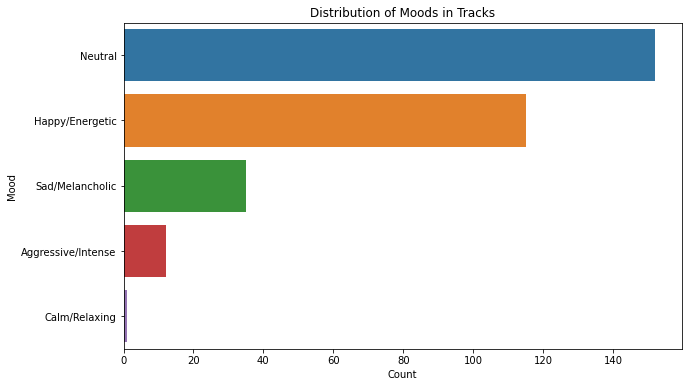

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(y='mood', data=df_last, order=df_last['mood'].value_counts().index)
plt.title('Distribution of Moods in Tracks')
plt.xlabel('Count')
plt.ylabel('Mood')
plt.show()

In [84]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                315 non-null    object 
 1   name              315 non-null    object 
 2   artist            315 non-null    object 
 3   popularity        315 non-null    int64  
 4   danceability      315 non-null    float64
 5   energy            315 non-null    float64
 6   key               315 non-null    int64  
 7   loudness          315 non-null    float64
 8   mode              315 non-null    int64  
 9   speechiness       315 non-null    float64
 10  acousticness      315 non-null    float64
 11  instrumentalness  315 non-null    float64
 12  liveness          315 non-null    float64
 13  valence           315 non-null    float64
 14  tempo             315 non-null    float64
 15  type              315 non-null    object 
 16  uri               315 non-null    object 
 1

# Machine Learning

In [85]:
ml_df =df_last.drop(['id','name','artist','duration_ms','uri','track_href','time_signature','type','analysis_url'],axis=1)

In [86]:
ml_df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,mood
0,19,0.576,0.667,10,-7.370,0,0.0701,0.2500,0.000000,0.202,0.480,80.956,4.437150,Neutral
1,45,0.665,0.800,4,-5.450,0,0.0617,0.0166,0.000002,0.342,0.395,97.030,3.139400,Neutral
2,40,0.533,0.857,9,-5.064,0,0.0673,0.2530,0.015000,0.108,0.504,96.955,4.453617,Happy/Energetic
3,33,0.619,0.914,1,-6.162,0,0.0474,0.0348,0.044200,0.296,0.577,128.028,5.621017,Happy/Energetic
4,56,0.497,0.633,3,-6.710,0,0.0809,0.2930,0.000000,0.123,0.496,88.003,3.970750,Neutral


In [87]:
from sklearn.preprocessing import LabelEncoder

# Assuming df_last is your DataFrame and 'mood' is the column to be encoded
# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the 'mood' column and transform it
ml_df['mood'] = le.fit_transform(ml_df['mood'])
df_last['mood'] = le.fit_transform(df_last['mood'])

# Now 'mood_encoded' contains numerical labels for the moods

In [88]:
ml_df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,mood
0,19,0.576,0.667,10,-7.370,0,0.0701,0.2500,0.000000,0.202,0.480,80.956,4.437150,3
1,45,0.665,0.800,4,-5.450,0,0.0617,0.0166,0.000002,0.342,0.395,97.030,3.139400,3
2,40,0.533,0.857,9,-5.064,0,0.0673,0.2530,0.015000,0.108,0.504,96.955,4.453617,2
3,33,0.619,0.914,1,-6.162,0,0.0474,0.0348,0.044200,0.296,0.577,128.028,5.621017,2
4,56,0.497,0.633,3,-6.710,0,0.0809,0.2930,0.000000,0.123,0.496,88.003,3.970750,3


## Mood prediction using Random Forest

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming df_last is your DataFrame

# Prepare the data
# Selecting features - replace with your chosen features
X = ml_df.drop('mood', axis=1)
# Target variable
y = ml_df['mood']



# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           2       0.97      1.00      0.99        37
           3       0.93      0.95      0.94        44
           4       0.91      1.00      0.95        10

    accuracy                           0.95        95
   macro avg       0.95      0.80      0.82        95
weighted avg       0.95      0.95      0.94        95



## Song reccomendation based on mood feature with Nearest Neighbors

In [91]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Assuming df_last is your DataFrame with Spotify tracks and their features
# Let's say you also have a user's favorite track IDs

# Feature selection for the model
features = df_last[['mood']]
model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(features)

# For user's favorite track, find similar tracks
favorite_track_id = '6mcXPgXwsLHK6QITtee0BS'
favorite_track_features = df_last[df_last['id'] == favorite_track_id][features.columns]

# Find similar tracks
distances, indices = model.kneighbors(favorite_track_features)

# Retrieve recommended track IDs
recommended_track_ids = df_last.iloc[indices[0]]['id']

# Fetch track details using Spotify API or use existing DataFrame for details


In [92]:
# Fetch track details using Spotify API or use existing DataFrame for details
recommended_tracks = fetch_track_details(sp, recommended_track_ids)
df_recommended_tracks = pd.DataFrame(recommended_tracks)
df_recommended_tracks.head(10)

,id,name,artist,popularity
0,400AjGhFGfVKEMSXf1AzPn,Bir Hayli,Murat Dalkılıç,62
1,3cXe9k3ovSbItUKyk0fyUu,Açık Deniz,Sıla,38
2,3bvGaifvKsJZCOQ43wouro,Canımsın Sen - Volga Tamöz Remix,Sezen Aksu,33
3,4owgCXz2KekhwGXTmF4Ztd,Günah Sevap,Aynur Aydın,59
4,5tM5kDTxYKCFJzlfyXiTpF,Kafa,Sıla,62
5,6mcXPgXwsLHK6QITtee0BS,Vay Be - Mahmut Orhan Remix,Kenan Doğulu,40
6,4p8rFioMzjHuoJF5gzw9Fy,A Canım,Mabel Matiz,54
7,3ExN5IQsWu2otaXOI3EJGt,Hayırlı Günler,Aydın Kurtoğlu,57
8,0eKJQse3prmCzpyjGxNwlT,Karma - Aytac Kart Remix,Buray,39
9,4uPCwBlcAFBEjPtGjsdgqo,İnşallah,Sıla,46
